<a href="https://colab.research.google.com/github/kkkkkkkm/Torch/blob/main/softmax_regression/softmax_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch as torch
import torchvision.datasets as dsets 
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
import random


In [3]:
USE_CUDA = torch.cuda.is_available()
device = torch.device("cuda" if USE_CUDA else "cpu")
print('다음 기기로 학습:' , device)

다음 기기로 학습: cuda


In [4]:
random.seed(777)
torch.manual_seed(777)

if device == 'cuda' :
  torch.cuda.manual_seed_all(777)


In [5]:
training_epoch = 15
batch_size = 100

In [8]:
mnist_train = dsets.MNIST(
    root= 'MNIST_data/',
    train = True,
    transform = transforms.ToTensor(),
    download = True)

mnist_test = dsets.MNIST(
    root= "MNIST_data/",
    train = False,
    transform = transforms.ToTensor(),
    download = True,
    )

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



In [9]:
data_loader = DataLoader(dataset=mnist_train,
                         batch_size = batch_size,
                         shuffle = True,
                         drop_last = True)

In [19]:
for x ,y in data_loader:
  print('x = ', x.shape)
  print('y = ', y.dtype)
  break

print(len(data_loader))

x =  torch.Size([100, 1, 28, 28])
y =  torch.int64
600


In [10]:
linear = nn.Linear(784,10,bias= True).to(device)


In [12]:
loss = nn.CrossEntropyLoss().to(device)

optimizer = torch.optim.SGD(linear.parameters(), lr = 0.1)

In [20]:
for epoch in range(training_epoch):
  avg_cost = 0
  total_batch = len(data_loader)


  for x ,y in data_loader:
    x = x.view(-1, 784).to(device)
    y = y.to(device)

    optimizer.zero_grad()

    h = linear(x)

    cost = loss(h, y)
    cost.backward()
    optimizer.step()


    avg_cost += cost / total_batch
  
  print('Epoch: {:.4f} , Cost : {:.4f},'.format(epoch, avg_cost))

print('finish')

Epoch: 0.0000 , Cost : 0.5348,
Epoch: 1.0000 , Cost : 0.3595,
Epoch: 2.0000 , Cost : 0.3316,
Epoch: 3.0000 , Cost : 0.3165,
Epoch: 4.0000 , Cost : 0.3072,
Epoch: 5.0000 , Cost : 0.2999,
Epoch: 6.0000 , Cost : 0.2951,
Epoch: 7.0000 , Cost : 0.2908,
Epoch: 8.0000 , Cost : 0.2872,
Epoch: 9.0000 , Cost : 0.2843,
Epoch: 10.0000 , Cost : 0.2818,
Epoch: 11.0000 , Cost : 0.2797,
Epoch: 12.0000 , Cost : 0.2777,
Epoch: 13.0000 , Cost : 0.2760,
Epoch: 14.0000 , Cost : 0.2746,
finish


accuracy: 88.17 
Label:  9
Prediction:  9


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:67: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:57: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


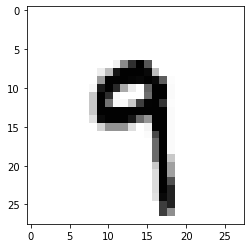

In [29]:
with torch.no_grad():  ## 모델 테스트 
  x_test = mnist_test.test_data.view(-1, 28*28).float().to(device)
  y_test = mnist_test.test_labels.to(device)

  prediction = linear(x_test)
  correct_predictin = torch.argmax(prediction,1) == y_test

  accuracy = correct_predictin.float().mean()

  print('accuracy: {:.2f} '.format(accuracy * 100))

  r = random.randint(0, len(mnist_test) - 1)
  X_single_data = mnist_test.test_data[r:r+1].view(-1, 28 * 28).float().to(device)
  Y_single_data = mnist_test.test_labels[r:r+1].to(device)

  print('Label: ', Y_single_data.item())
  single_prediction = linear(X_single_data)
  print('Prediction: ', torch.argmax(single_prediction, 1).item())

  plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
  plt.show()




In [28]:
x_test= mnist_test.test_data.view(-1 ,28*28)

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:67: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
